In [1]:
# Importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Loading data
data = load_dataset("lukebarousse/data_jobs")
df = data['train'].to_pandas()

# Cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else x)

c:\Users\Namitha john\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

Data analyst job in different job loactions in US

Text(0, 0.5, '')

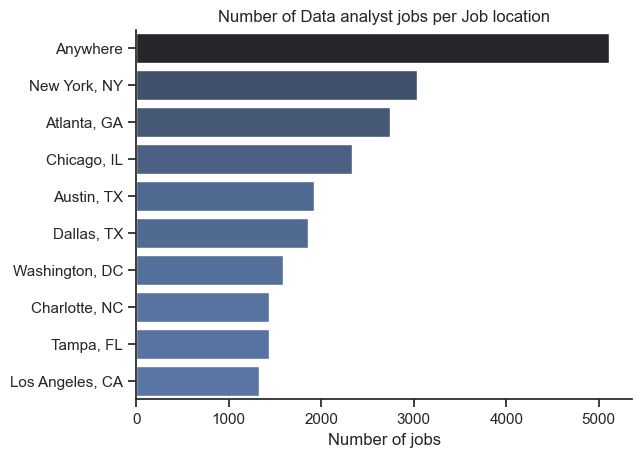

In [3]:
df_plot = df_da_us['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data = df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Data analyst jobs per Job location')
plt.xlabel('Number of jobs')
plt.ylabel('')


Pie Chart for different variables 

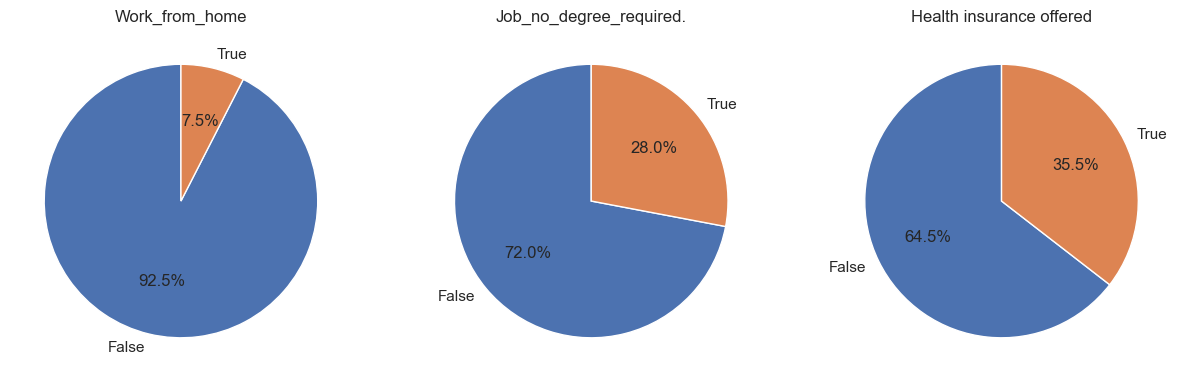

In [4]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches((15,5))

dict_column = {
    'job_work_from_home': 'Work_from_home',
    'job_no_degree_mention': 'Job_no_degree_required.',
    'job_health_insurance': 'Health insurance offered'
    
}

for i,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_da_us[column].value_counts(), startangle = 90, autopct='%1.1f%%', labels = ['False','True'])
    ax[i].set_title(title)

Data analyst job types in US

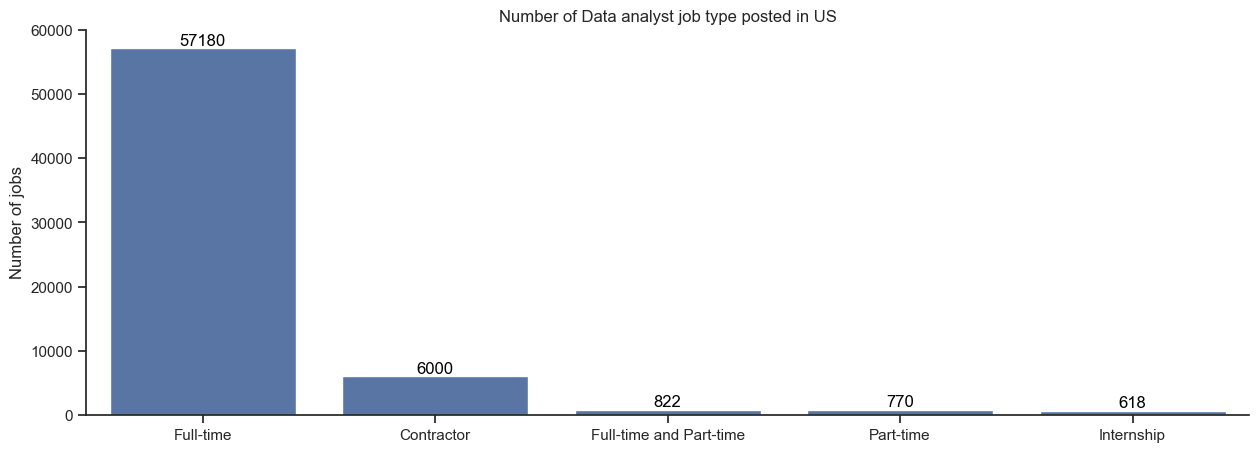

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches((15,5))


df_plot = df_da_us['job_schedule_type'].value_counts().head(5).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data = df_plot, x='job_schedule_type', y= 'count')
sns.despine()
plt.title('Number of Data analyst job type posted in US')
plt.xlabel('')
plt.ylabel('Number of jobs')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

Data analyst Job posted by different companies in US

Text(0, 0.5, '')

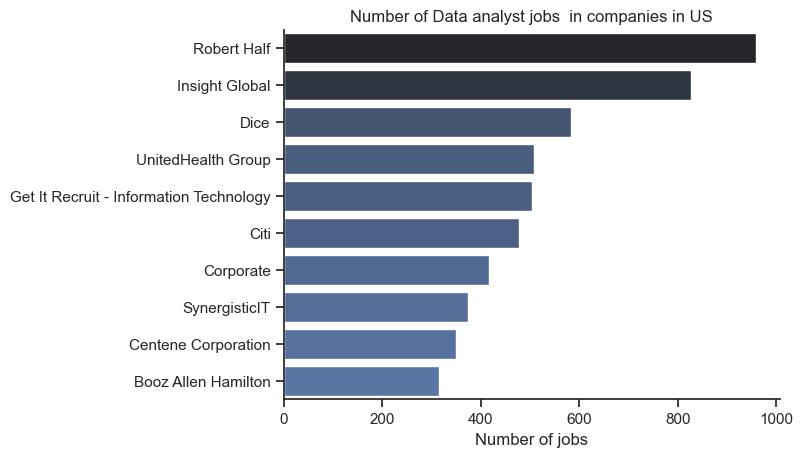

In [6]:
df_plot = df_da_us['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data = df_plot, x='count', y= 'company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Data analyst jobs  in companies in US')
plt.xlabel('Number of jobs')
plt.ylabel('')

Data analyst job posted in different months in US

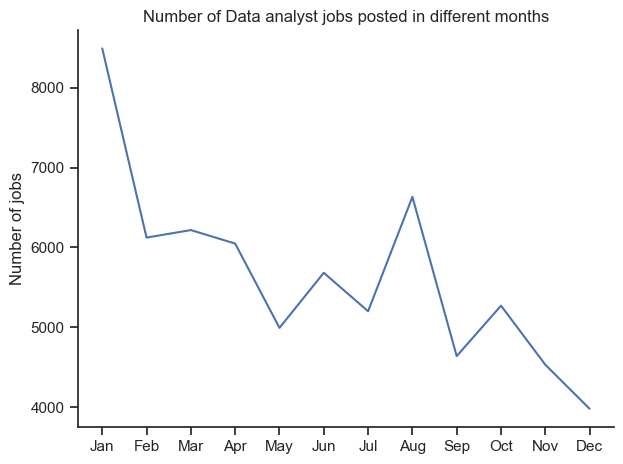

In [7]:



df_da_us['job_posted_month'] = df_da_us['job_posted_date'].dt.strftime('%b')
df_da_us
df_plot = df_da_us['job_posted_month'].value_counts().to_frame()
df_plot = df_plot.reset_index()
df_plot.columns = ['job_posted_month', 'count']
df_plot['month'] =  pd.to_datetime(df_plot['job_posted_month'], format = '%b').dt.month
df_plot.sort_values(by='month', inplace = True)
df_plot.set_index('job_posted_month', inplace = True)
df_plot.drop(columns='month', inplace= True)
df_plot


sns.set_theme(style='ticks')
sns.lineplot(data = df_plot, x='job_posted_month', y= 'count')
sns.despine()
plt.title('Number of Data analyst jobs posted in different months')
plt.xlabel('')
plt.ylabel('Number of jobs')
plt.tight_layout()
